Goals: Understand endangered species nationally. Data from several national parks from the National Park Service will be used to understand patterns related to certain species becoming endangered. Begin by importing libraries.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

Load data for EDA.

In [2]:
obvs = pd.read_csv("C:/Users/morel/Documents/GitHub/biodiversity/observations.csv")
print(obvs.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [3]:
spec = pd.read_csv("C:/Users/morel/Documents/GitHub/biodiversity/species_info.csv")
print(spec.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


Understand cleaning needs.

In [4]:
print(obvs.scientific_name.isna().value_counts(), obvs.park_name.isna().value_counts(), obvs.observations.isna().value_counts(), spec.category.isna().value_counts(), spec.scientific_name.isna().value_counts(), spec.common_names.isna().value_counts(), spec.conservation_status.isna().value_counts())

scientific_name
False    23296
Name: count, dtype: int64 park_name
False    23296
Name: count, dtype: int64 observations
False    23296
Name: count, dtype: int64 category
False    5824
Name: count, dtype: int64 scientific_name
False    5824
Name: count, dtype: int64 common_names
False    5824
Name: count, dtype: int64 conservation_status
True     5633
False     191
Name: count, dtype: int64


In [5]:
print(spec.conservation_status.value_counts())

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


In table obvs, there are no missing values. In table spec, column conservation_status has 5633 missing values. From spec.conservation_status.value_counts() other values are "Species of Concern" (161), "Endangered" (16), "Threatened" (10), "In Recovery" (4): 191 total. Lists of conservation statuses elsewhere include "Least Concern", these 5600-odd species appear to have 'no conservations status'. Fill them with "Least Concern".

In [6]:
spec.conservation_status.fillna("Least Concern", inplace = True)
print(spec.conservation_status.value_counts())

conservation_status
Least Concern         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


C:\Users\morel\AppData\Local\Temp\ipykernel_1180\3567395301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spec.conservation_status.fillna("Least Concern", inplace = True)


In [7]:
print(obvs.duplicated().value_counts(), spec.duplicated().value_counts())

False    23281
True        15
Name: count, dtype: int64 False    5824
Name: count, dtype: int64


There are 15 dupliacted observations in obvs and no duplicated observations in spec. Remove duplicates

In [8]:
obvs = obvs.drop_duplicates()
print(obvs.duplicated().value_counts())

False    23281
Name: count, dtype: int64


With data cleaned: which animals have which conservation status? significant difference in conservation status? mode species at each park.

In [9]:
type_by_status = spec.groupby(['conservation_status', 'category']).scientific_name.count().reset_index()
print(type_by_status)

   conservation_status           category  scientific_name
0           Endangered          Amphibian                1
1           Endangered               Bird                4
2           Endangered               Fish                3
3           Endangered             Mammal                7
4           Endangered     Vascular Plant                1
5          In Recovery               Bird                3
6          In Recovery             Mammal                1
7        Least Concern          Amphibian               73
8        Least Concern               Bird              442
9        Least Concern               Fish              116
10       Least Concern             Mammal              176
11       Least Concern  Nonvascular Plant              328
12       Least Concern            Reptile               74
13       Least Concern     Vascular Plant             4424
14  Species of Concern          Amphibian                4
15  Species of Concern               Bird               

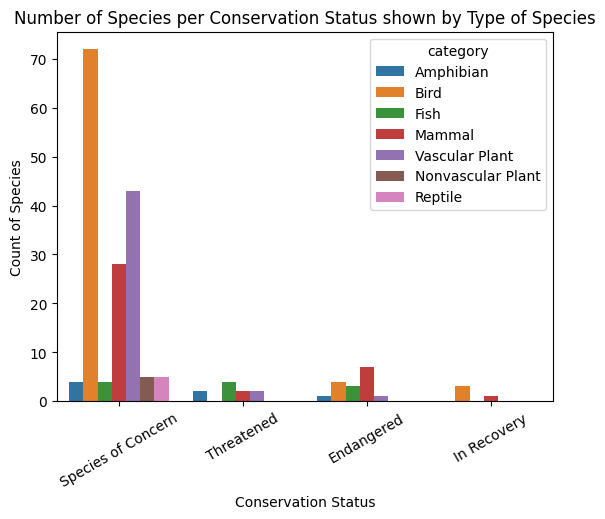

<Figure size 640x480 with 0 Axes>

In [10]:
sns.barplot(x='conservation_status', y='scientific_name', hue='category', data=type_by_status[type_by_status['conservation_status'] != "Least Concern"], legend='auto', order=['Species of Concern', 'Threatened', 'Endangered', 'In Recovery'])
plt.xlabel('Conservation Status')
plt.xticks(rotation=30)
plt.ylabel('Count of Species')
plt.title('Number of Species per Conservation Status shown by Type of Species')
plt.show()
plt.clf()

Birds, vascular plants, and mammals are the categories showing the most species classified as "Species of Concern". No birds are "Threatened" and fish are the category of species most "Threatened". Mammals, birds, and fish are the types of species most often "Endangered". Birds and mammals are the only species "In Recovery". Now, to understand the significance of these differences.

In [11]:
spec['protected'] = spec['conservation_status'] != "Least Concern"
print(spec.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole       Least Concern   
1                              American Bison, Bison       Least Concern   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...       Least Concern   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)       Least Concern   
4                                      Wapiti Or Elk       Least Concern   

   protected  
0      False  
1      False  
2      False  
3      False  
4      False  


In [12]:
protected = spec.groupby(['category', 'protected']).scientific_name.count().reset_index().pivot(columns='protected', index='category', values='scientific_name').reset_index()
protected.columns = ['category', 'not_protected', 'protected']
print(protected)

            category  not_protected  protected
0          Amphibian             73          7
1               Bird            442         79
2               Fish            116         11
3             Mammal            176         38
4  Nonvascular Plant            328          5
5            Reptile             74          5
6     Vascular Plant           4424         46


In [13]:
protected['percent protected'] = protected.protected / (protected.protected + protected.not_protected) * 100
print(protected)

            category  not_protected  protected  percent protected
0          Amphibian             73          7           8.750000
1               Bird            442         79          15.163148
2               Fish            116         11           8.661417
3             Mammal            176         38          17.757009
4  Nonvascular Plant            328          5           1.501502
5            Reptile             74          5           6.329114
6     Vascular Plant           4424         46           1.029083


Birds and mammals are the two categories most likely to have a conservation status and be protected species. Plants are the least likely to be protected. Understand the significance in the difference.

In [14]:
from scipy.stats import chi2_contingency as chi

In [15]:
test1 = protected.loc[[1, 3], ['not_protected','protected']]
print(test1)

   not_protected  protected
1            442         79
3            176         38


In [16]:
chi2, p, dof, expected = chi(test1)
print(chi2, p, dof, expected)

0.5810483277947567 0.445901703047197 1 [[438.06530612  82.93469388]
 [179.93469388  34.06530612]]


Birds and mammals have no statistical difference between them (0.44 > .05). They are equally as likely to be protected as each other as not. Next mammals and amphibians, there is a large gap between mammals & birds and the remaining categories with amphibians being the third most protected.

In [17]:
test2 = protected.loc[[0,3], ['not_protected','protected']]
chi2, p, dof, expected = chi(test2)
print(test2, chi2, p, dof, expected)

   not_protected  protected
0             73          7
3            176         38 2.982497748001351 0.08416928847464537 1 [[ 67.75510204  12.24489796]
 [181.24489796  32.75510204]]


Birds, mammals, and amphibians have no statistical difference between them (0.08 > 0.05). They are equally as liekly to be protected as each other as not. Fish are the fourth most protected category.

In [18]:
test3 = protected.loc[[2,3], ['not_protected','protected']]
chi2, p, dof, expected = chi(test3)
print(test3, chi2, p, dof, expected)

   not_protected  protected
2            116         11
3            176         38 4.644937895246063 0.0311452640827806 1 [[108.75073314  18.24926686]
 [183.24926686  30.75073314]]


Mammals and fish are statistically different from each other (.03 < .05). Mammals are statistically more likely to be protected than fish and likely all the remaining categories.

In [19]:
obvs['genus'] = obvs.scientific_name.str.split(' ', expand=True)[0]
find_max = obvs.groupby(['park_name', 'genus']).observations.sum().reset_index()
print(find_max)

                   park_name        genus  observations
0        Bryce National Park        Abies           301
1        Bryce National Park  Abietinella           101
2        Bryce National Park      Abronia            92
3        Bryce National Park     Abutilon            84
4        Bryce National Park     Acalypha           361
...                      ...          ...           ...
6375  Yosemite National Park      Zenaida           123
6376  Yosemite National Park    Zigadenus           722
6377  Yosemite National Park        Zizia           531
6378  Yosemite National Park  Zonotrichia           910
6379  Yosemite National Park      Zygodon           369

[6380 rows x 3 columns]


In [20]:
for park in find_max.park_name.unique():
    index = find_max[find_max.park_name == park].observations.idxmax()
    print(find_max.loc[index])

park_name       Bryce National Park
genus                         Carex
observations                  21574
Name: 269, dtype: object
park_name       Great Smoky Mountains National Park
genus                                         Carex
observations                                  16437
Name: 1864, dtype: object
park_name       Yellowstone National Park
genus                               Carex
observations                        54083
Name: 3459, dtype: object
park_name       Yosemite National Park
genus                            Carex
observations                     33236
Name: 5054, dtype: object


Carex is the most often observed genus in all four national parks. There are 21574 sightings in Bryce National Park, 16437 sightings in Great Smoky Mountains National Park, 54083 sightings in Yellowstone National Park, and 33236 sightings in Yosemite National Park. Now find the common name for reporting's sake.

In [21]:
for name in spec.scientific_name.unique():
    if 'Carex' in name:
        print(spec.common_names[spec.scientific_name == name])

1947    Carex, Sedge, Sedge Species, Sedges
Name: common_names, dtype: object
1948    Thicket Sedge
Name: common_names, dtype: object
1949    Summer Sedge
Name: common_names, dtype: object
1950    Glomerate Sedge
Name: common_names, dtype: object
1951    Whitetinge Sedge
Name: common_names, dtype: object
1952    Sedge
Name: common_names, dtype: object
1953    Sedge
Name: common_names, dtype: object
1954    Emmons Sedge, Sedge
Name: common_names, dtype: object
1955    Greenish-White Sedge, Light-Colored Sedge
Name: common_names, dtype: object
1956    A Sedge, Sedge
Name: common_names, dtype: object
1957    Eastern Narrowleaf Sedge
Name: common_names, dtype: object
1958    A Sedge, Rigid Sedge
Name: common_names, dtype: object
1959    Turgid Sedge
Name: common_names, dtype: object
1960    A Sedge, Sedge
Name: common_names, dtype: object
1961    Appalachian Sedge
Name: common_names, dtype: object
1962    Prickly Bog Sedge
Name: common_names, dtype: object
1963    Sedge
Name: common_names,

Sedges species of the genus Carex and are the most common species overall seen in these four national parks.

In [22]:
overview = pd.merge(spec, obvs, on='scientific_name', how='inner')
reptiles = overview[overview.category == 'Reptile']
find_max = reptiles.groupby(['park_name', 'genus']).observations.sum().reset_index()
for park in find_max.park_name.unique():
    index = find_max[find_max.park_name == park].observations.idxmax()
    print(find_max.loc[index])

park_name       Bryce National Park
genus                  Lampropeltis
observations                    854
Name: 21, dtype: object
park_name       Great Smoky Mountains National Park
genus                                  Lampropeltis
observations                                    707
Name: 59, dtype: object
park_name       Yellowstone National Park
genus                        Lampropeltis
observations                         1960
Name: 97, dtype: object
park_name       Yosemite National Park
genus                     Lampropeltis
observations                      1153
Name: 135, dtype: object


Lampropeltis is the most often observed reptile genus in all four national parks. There are 854 sightings in Bryce National Park, 707 sightings in Great Smoky Mountains National Park, 1960 sightings in Yellowstone National Park, and 1153 sightings in Yosemite National Park. Now find the common name for reporting's sake.

In [23]:
for name in spec.scientific_name.unique():
    if 'Lampropeltis' in name:
        print(spec.common_names[spec.scientific_name == name])

371    Kingsnakes, Milk Snakes
Name: common_names, dtype: object
372    Mole Kingsnake
Name: common_names, dtype: object
373    Eastern Kingsnake
Name: common_names, dtype: object
374    Black Kingsnake
Name: common_names, dtype: object
375    Scarlet Kingsnake
Name: common_names, dtype: object
376    Eastern Milk Snake
Name: common_names, dtype: object
4583    California Kingsnake
Name: common_names, dtype: object
4584    Sierra Mountain Kingsnake
Name: common_names, dtype: object


Lampropeltis are Kingsnakes. They are the most often observed reptile in these 4 national parks.

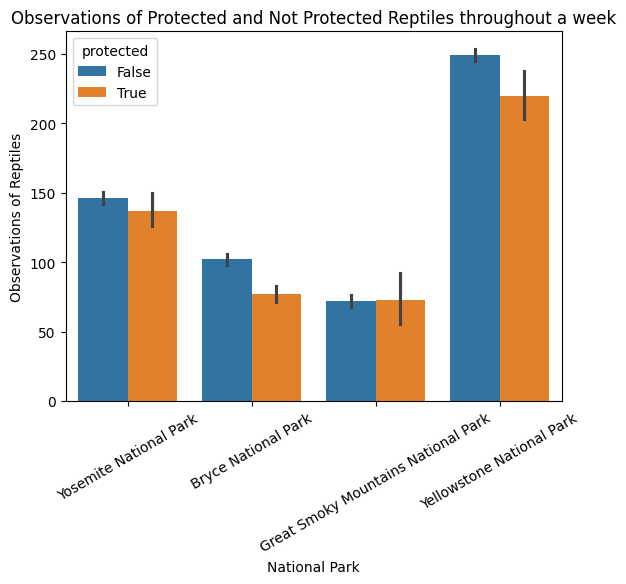

In [24]:
sns.barplot(x=reptiles.park_name, y=reptiles.observations, hue=reptiles.protected)
plt.xlabel('National Park')
plt.ylabel('Observations of Reptiles')
plt.title('Observations of Protected and Not Protected Reptiles throughout a week')
plt.xticks(rotation = 30)
plt.show()
plt.close()

In [25]:
overview = pd.merge(spec, obvs, on='scientific_name', how='inner')
overview['protected'] = overview['protected'].replace({True: 'Yes', False: 'No'})
most_protected = overview[overview.protected == 'Yes']
find_max = most_protected.groupby(['park_name', 'genus']).observations.sum().reset_index()
for park in find_max.park_name.unique():
    index = find_max[find_max.park_name == park].observations.idxmax()
    print(find_max.loc[index])

park_name       Bryce National Park
genus                        Myotis
observations                   2164
Name: 91, dtype: object
park_name       Great Smoky Mountains National Park
genus                                        Myotis
observations                                   1319
Name: 240, dtype: object
park_name       Yellowstone National Park
genus                              Myotis
observations                         4774
Name: 389, dtype: object
park_name       Yosemite National Park
genus                           Myotis
observations                      2871
Name: 538, dtype: object


Myotis is the most often observed protected genus in all four national parks. There are 2164 sightings in Bryce National Park, 1319 sightings in Great Smoky Mountains National Park, 4774 sightings in Yellowstone National Park, and 2871 sightings in Yosemite National Park. Now find the common name for reporting's sake.

In [26]:
for name in spec.scientific_name.unique():
    if 'Myotis' in name:
        print(spec.common_names[spec.scientific_name == name])

33    Mississippi Myotis, Southeastern Myotis
Name: common_names, dtype: object
34    Gray Myotis
Name: common_names, dtype: object
35    Keen's Myotis
Name: common_names, dtype: object
36    Eastern Small-Footed Bat, Eastern Small-Footed...
Name: common_names, dtype: object
37                  Little Brown Bat, Little Brown Myotis
3042    Little Brown Bat, Little Brown Myotis, Little ...
4467                                  Little Brown Myotis
Name: common_names, dtype: object
38    Northern Long-Eared Bat, Northern Myotis
Name: common_names, dtype: object
39    Indiana Bat, Indiana Or Social Myotis
Name: common_names, dtype: object
3039    California Myotis, California Myotis, Californ...
4465                                    California Myotis
Name: common_names, dtype: object
3040    Small-Footed Myotis, Western Small-Footed Bat,...
4466                                  Small-Footed Myotis
Name: common_names, dtype: object
3041    Long-Eared Myotis, Long-Eared Myotis
Name: common

Myotis are bats. They are the most often observed protected species in these four national parks.

In [27]:
overview = pd.merge(spec, obvs, on='scientific_name', how='inner')
overview['protected'] = overview['protected'].replace({True: 'Yes', False: 'No'})
most_protected = overview[overview.protected == 'Yes']
find_min = most_protected.groupby(['park_name', 'genus']).observations.sum().reset_index()
for park in find_min.park_name.unique():
    index = find_min[find_min.park_name == park].observations.idxmin()
    print(find_max.loc[index])

park_name       Bryce National Park
genus                    Chasmistes
observations                     23
Name: 33, dtype: object
park_name       Great Smoky Mountains National Park
genus                                          Grus
observations                                     13
Name: 212, dtype: object
park_name       Yellowstone National Park
genus                                Grus
observations                           57
Name: 361, dtype: object
park_name       Yosemite National Park
genus                       Chasmistes
observations                        35
Name: 480, dtype: object


There are two least often observed protected genuses. Chasmistes was sighted 23 times in Bryce National Park and 35 times in Yosemite National Park. Grus was sighted 13 times in Great Smokey Mountains National Park and 57 times in Yellowstone National Park. Find common names.

In [30]:
for name in spec.scientific_name.unique():
    if 'Chasmistes' in name:
        print(spec.common_names[spec.scientific_name == name])

3275    June Sucker
Name: common_names, dtype: object


Chasmistes are June Suckers, a species of fish.

In [31]:
for name in spec.scientific_name.unique():
    if 'Grus' in name:
        print(spec.common_names[spec.scientific_name == name])

173    Whooping Crane
Name: common_names, dtype: object
174    Sandhill Crane
Name: common_names, dtype: object


Grus are species of crane.

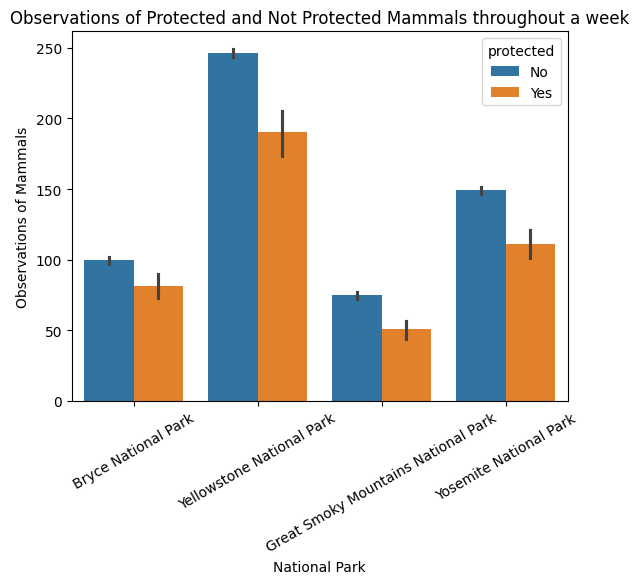

In [34]:
overview = pd.merge(spec, obvs, on='scientific_name', how='inner')
overview['protected'] = overview['protected'].replace({True: 'Yes', False: 'No'})
mammals = overview[overview.category == 'Mammal']
sns.barplot(x=mammals.park_name, y=mammals.observations, hue=mammals.protected)
plt.xlabel('National Park')
plt.ylabel('Observations of Mammals')
plt.title('Observations of Protected and Not Protected Mammals throughout a week')
plt.xticks(rotation = 30)
plt.show()
plt.close()

Protected mammals are seen less often than unprotected mammals.

Conclusions: Only 191 species had a conservaiton status and the remaining 5600-odd were not protected. Mammals were significantly more likely to be protected than every category expect birds. Birds and mammals had similar proportions of protected speices. Sedges were the most spotted species overall and kingsnakes were the most spotted reptile species. Both were most often spotted in Yellowstone National park. Also msot often spotted in Yellowstone National Park are bat species which are the protected species that is most often spottted (4774 sightings in Yellowstone). Out of the protected species, there are two that are least often seen. A fish called the June Sucker was only seen 35 times at the most at Yosemite National Park and 23 times at the least at Bryce National Park. The least often seen species were cranes: seen only 13 times in Great Smokey Mountains National Park but also 57 times at Yellowstone National Park. These two species were not seen at all in each other's parks.